In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.patches as patches
import gudhi as gd
import gudhi.representations

## Drawing complex rips and cech and comparison

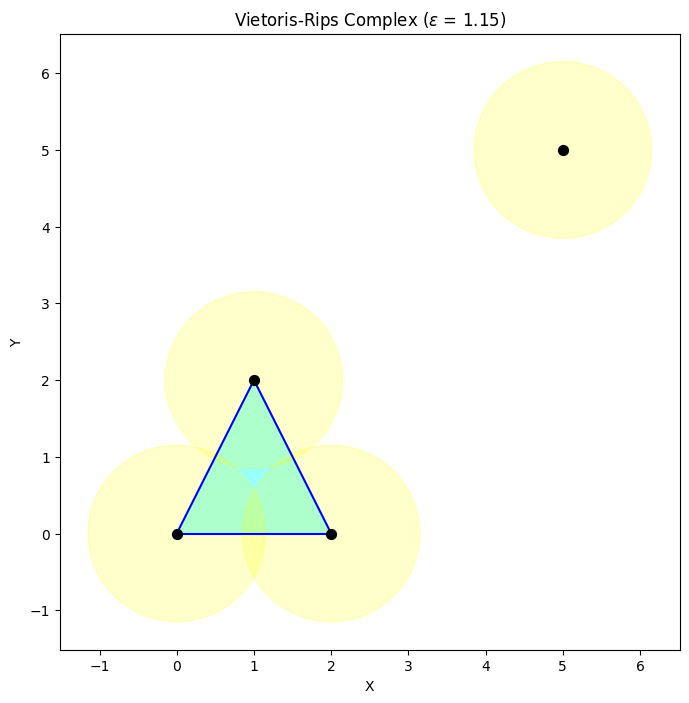

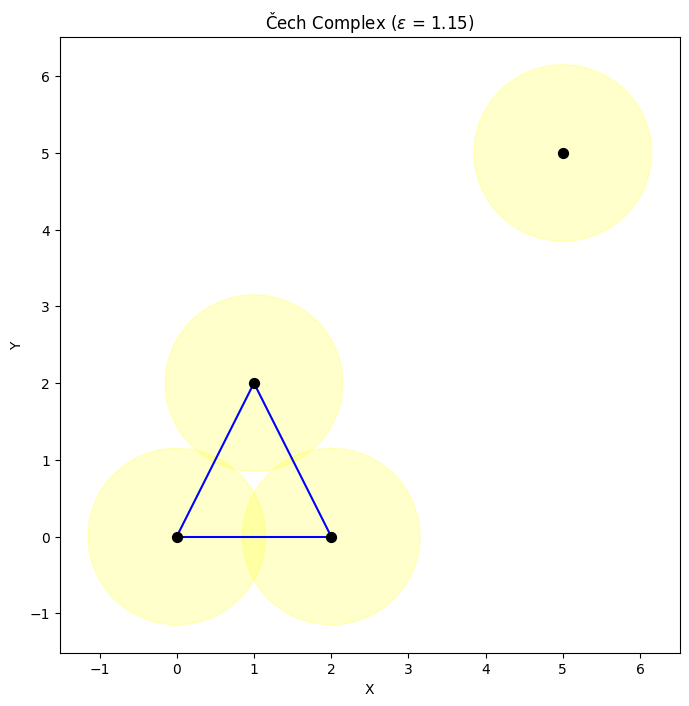

In [2]:
def vietoris_rips_complex(points, r):
    n = len(points)
    balls = []
    
    for i in range(n):
        balls.append(Circle(points[i], r, color='yellow', alpha=0.2))

    rc = gd.RipsComplex(points=points, max_edge_length=2*r)
    st = rc.create_simplex_tree(max_dimension=2) 
    return st, balls

def getSimplicesDimension(complex,dim):
    simplices=[]
    for simplex in complex.get_skeleton(2):
        dimension = len(simplex[0]) - 1 
        if dimension == dim:
            simplices.append(simplex[0])
    return simplices

def drawComplex(points,balls,edges,simplices,radius,name):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], c='black', s=50, zorder=2)
    for ball in balls:
        plt.gca().add_patch(ball)

    for (i, j) in edges:
        plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'b-', zorder=1)

    for (i, j, k) in simplices:
        plt.fill([points[i, 0], points[j, 0], points[k, 0]], 
                [points[i, 1], points[j, 1], points[k, 1]], 'cyan', alpha=0.4, zorder=0)

    plt.title(rf"{name} Complex ($\varepsilon$ = {r})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(False)
    plt.savefig(f'{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

#Vietoris-rips complex
points = np.array([[0, 0], [2, 0], [1, 2], [5, 5]])
r = 1.15
complex,balls = vietoris_rips_complex(points,r)
edges=getSimplicesDimension(complex,1)
simplices=getSimplicesDimension(complex,2)
drawComplex(points,balls,edges,simplices,r,"Vietoris-Rips")

#Cech complex
points = np.array([[0, 0], [2, 0], [1, 2], [5, 5]])
r = 1.15
complex,balls = vietoris_rips_complex(points,r)
edges=getSimplicesDimension(complex,1)
simplices=[]
drawComplex(points,balls,edges,simplices,r,"Čech" )

## Filtration

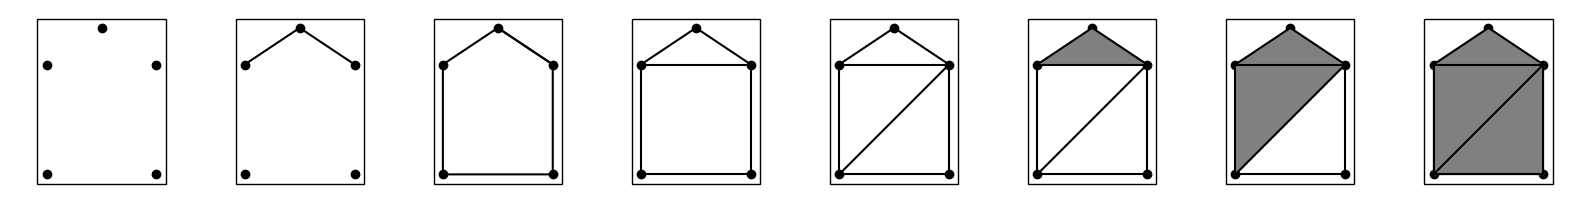

In [38]:
# Crear una figura y subplots
fig, axs = plt.subplots(1, 8, figsize=(16, 4))

# Definir las coordenadas de los puntos
points = [(0.2, 0.8), (0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.5, 1.0)]

# Paso 1: Solo los puntos
axs[0].scatter(*zip(*points), color='black')

# Paso 2: Agregar las líneas del techo
axs[1].scatter(*zip(*points), color='black')
axs[1].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')

# Paso 3: Agregar el cuadrado base
axs[2].scatter(*zip(*points), color='black')
axs[2].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[2].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[4][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[4][1]], color='black')

# Paso 4: Agregar línea horizontal
axs[3].scatter(*zip(*points), color='black')
axs[3].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[3].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')

# Paso 5: Agregar una diagonal
axs[4].scatter(*zip(*points), color='black')
axs[4].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[4].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[4].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')

# Paso 6: Sombrear el techo
axs[5].scatter(*zip(*points), color='black')
axs[5].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[5].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[5].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
axs[5].add_patch(patches.Polygon([points[0], points[3], points[4]], closed=True, color='gray'))

# Paso 7: Sombrear una parte del cuadrado
axs[6].scatter(*zip(*points), color='black')
axs[6].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[6].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[6].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
axs[6].add_patch(patches.Polygon([points[0], points[3], points[4]], closed=True, color='gray'))
axs[6].add_patch(patches.Polygon([points[0], points[1], points[3]], closed=True, color='gray'))

# Paso 8: Sombrear el área total
axs[7].scatter(*zip(*points), color='black')
axs[7].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[7].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[7].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
axs[7].add_patch(patches.Polygon([points[0], points[3], points[4]], closed=True, color='gray'))
axs[7].add_patch(patches.Polygon([points[1], points[2], points[3]], closed=True, color='gray'))
axs[7].add_patch(patches.Polygon([points[0], points[1], points[3]], closed=True, color='gray'))

# Quitar los ejes y agregar bordes
for ax in axs:
    ax.axis('off')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.1)
    ax.set_aspect('equal')
    ax.add_patch(patches.Rectangle((0.15, 0.15), 0.7, 0.9, edgecolor='black', fill=False))

plt.tight_layout()
plt.savefig('images/Filtration.png', dpi=300, bbox_inches='tight')
plt.show()


# Persistence diagram and persitence barcode



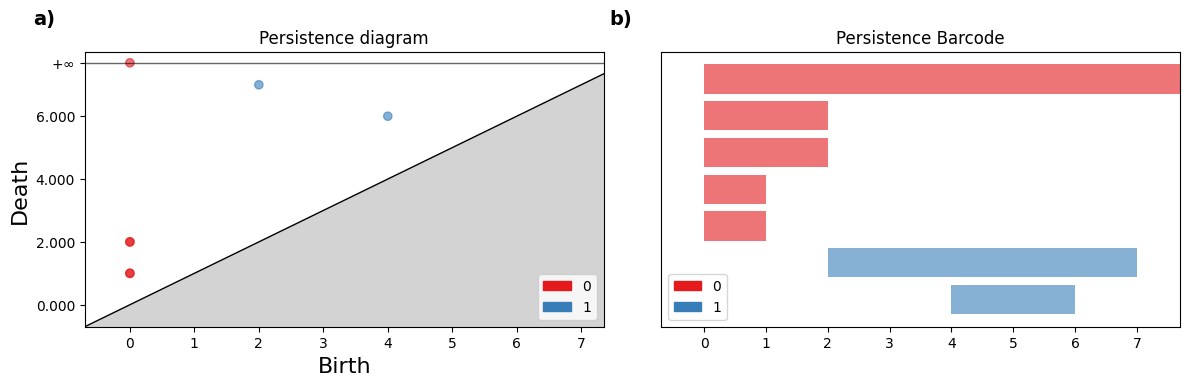

In [37]:
simplex_tree = gd.SimplexTree()

# Agregar simplices según la filtración de la imagen
# t = 0: solo puntos
simplex_tree.insert([0], filtration=0)
simplex_tree.insert([1], filtration=0)
simplex_tree.insert([2], filtration=0)
simplex_tree.insert([3], filtration=0)
simplex_tree.insert([4], filtration=0)

# t = 1: agregar aristas
simplex_tree.insert([0, 1], filtration=1)
simplex_tree.insert([1, 2], filtration=1)

# t = 2
simplex_tree.insert([2, 3], filtration=2)
simplex_tree.insert([3, 4], filtration=2)
simplex_tree.insert([4, 0], filtration=2)

# t = 3
simplex_tree.insert([2, 3], filtration=3)

# t = 4
simplex_tree.insert([2, 4], filtration=4)

# t = 5
simplex_tree.insert([0, 1,2], filtration=5)

# t = 6
simplex_tree.insert([0, 2,4], filtration=6)

# t = 7
simplex_tree.insert([2, 3,4], filtration=7)

persistence = simplex_tree.persistence()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
gd.plot_persistence_diagram(persistence,legend=True,axes=ax1) #legend false so that the dimension does not appear, they are all dim 0
ax1.set_title('Persistence diagram')
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')

# Graficar el código de barras de persistencia
gd.plot_persistence_barcode(persistence,legend=True,axes=ax2)
ax1.set_title('Persistence diagram')
ax2.text(-0.1, 1.1, 'b)', transform=ax2.transAxes, fontsize=14, fontweight='bold')

plt.title("Persistence Barcode")
plt.tight_layout()
plt.savefig('images/PDandPB.png', dpi=300, bbox_inches='tight')
plt.show()


## Entropy calculation, supposing you have the probability of each element in the persistence barcode, defined in p. Dimension 0 of previous figure.

In [18]:
import numpy as np
p=np.array([1/14,1/14,2/14,2/14,8/14])
entropy=-np.sum(p*np.log(p)) #np.log is the neperian logarithm that is used and np.log10 is base 10.
round(entropy,2)

np.float64(1.25)

## BettiCurve

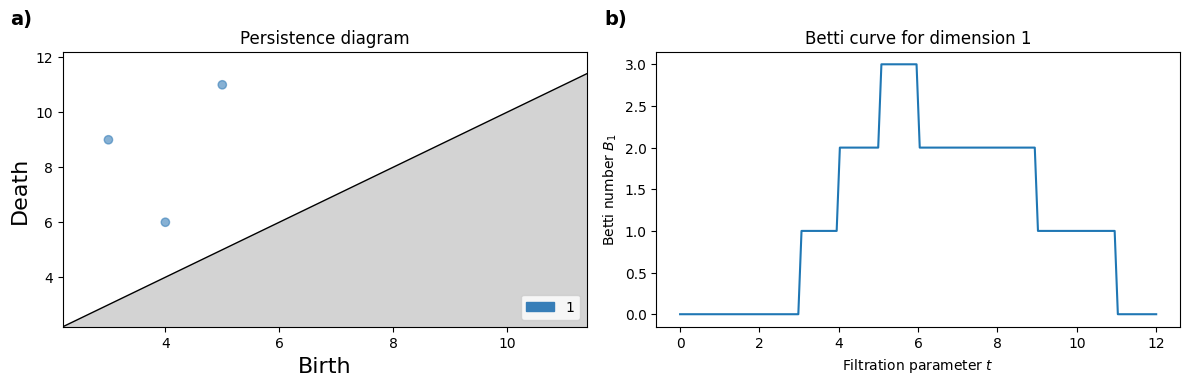

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dgmX=[(1,(3,9)), # (dim, (birth,death)
     (1,(4,6)),
     (1,(5,11))]

gd.plot_persistence_diagram(dgmX,legend=True,axes=ax1) #legend false so that the dimension does not appear, they are all dim 0
ax1.set_title('Persistence diagram')
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')

BC = gd.representations.BettiCurve(sample_range=[0,12], resolution = 150)
bc_normal = BC.fit_transform([np.array([[3,9],[4,6],[5,11]])])
xseq = np.linspace(0,12,150)
ax2.plot(xseq, bc_normal[0])
ax2.set_title('Betti curve for dimension 1')
ax2.text(-0.1, 1.1, 'b)', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2.set_xlabel("Filtration parameter $t$")
ax2.set_ylabel("Betti number $B_1$")
plt.savefig('images/BettiCurveExample.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## Persistence diagram and barcode example 2

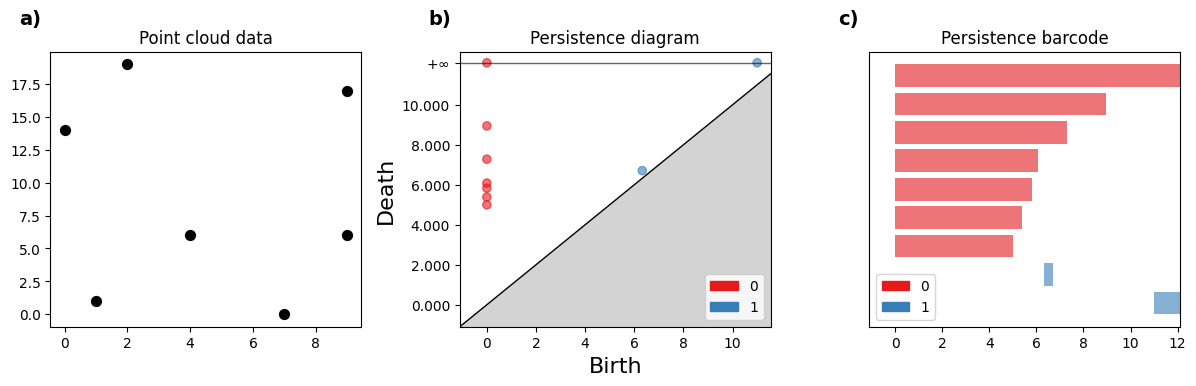

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

points = [[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]]
X = np.array(points)
ax1.scatter(X[:, 0], X[:, 1], c='black', s=50, zorder=2)
ax1.set_title('Point cloud data')
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')
ax1.set_aspect('auto')

# diagram

acX = gudhi.RipsComplex(points=points, max_edge_length=12.0).create_simplex_tree(max_dimension=2)
dgmX = acX.persistence()

gd.plot_persistence_diagram(dgmX,legend=True,axes=ax2) 
ax2.set_title('Persistence diagram')
ax2.text(-0.1, 1.1, 'b)', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2.set_aspect('auto')

gd.plot_persistence_barcode(dgmX,legend=True,axes=ax3) 
ax3.set_title('Persistence barcode')
ax3.text(-0.1, 1.1, 'c)', transform=ax3.transAxes, fontsize=14, fontweight='bold')
ax3.set_aspect('auto')

plt.tight_layout()
plt.savefig('images/DiagramBarcodeExample.png', dpi=300, bbox_inches='tight')
plt.show()

## Landscapes

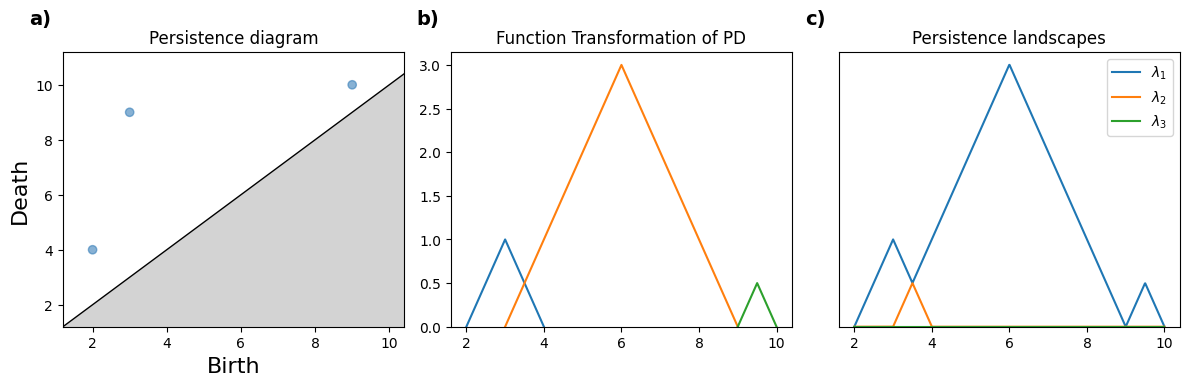

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# diagrama
dgmX=[(1,(2,4)), # (dim, (birth,death)
     (1,(3,9)),
     (1,(9,10))]

gd.plot_persistence_diagram(dgmX,legend=False,axes=ax1) #legend false para que npo aparezca la dimension, son todo dim 0
ax1.set_title('Persistence diagram')
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')


#function transformation
intervals=np.array([[2,4],
           [3,9],
           [9,10]])

for i in intervals:
    f1=np.array([[i[0],0],[(i[0]+i[1])/2,(i[1]-i[0])/2],[i[1],0]])
    x_values = f1[:, 0]
    y_values = f1[:, 1]
    ax2.plot(x_values, y_values)
ax2.set_title("Function Transformation of PD")
ax2.text(-0.1, 1.1, 'b)', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2.set_ylim(0)

#persistence landscape
nL = intervals.shape[0]
resol=1000
LS = gd.representations.Landscape(num_landscapes=nL, resolution=resol,sample_range=[np.min(intervals),np.max(intervals)])
L = LS.fit_transform([intervals])
initial_point = np.min(intervals)
final_point = np.max(intervals)

# Generate 1000 equidistant points between start_point and end_point
points = np.linspace(initial_point, final_point, resol)
for i in range(nL):
    start=i*resol
    end=(i+1)*resol
    ax3.plot(points,L[0][start:end],label=f"$\lambda_{i+1}$")
ax3.set_title("Persistence landscapes")
ax3.text(-0.1, 1.1, 'c)', transform=ax3.transAxes, fontsize=14, fontweight='bold')
ax3.legend()
ax3.set_yticks([])
ax3.set_ylim(0)
ax3.set_yticks([])


plt.savefig('images/LandscapeExample.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

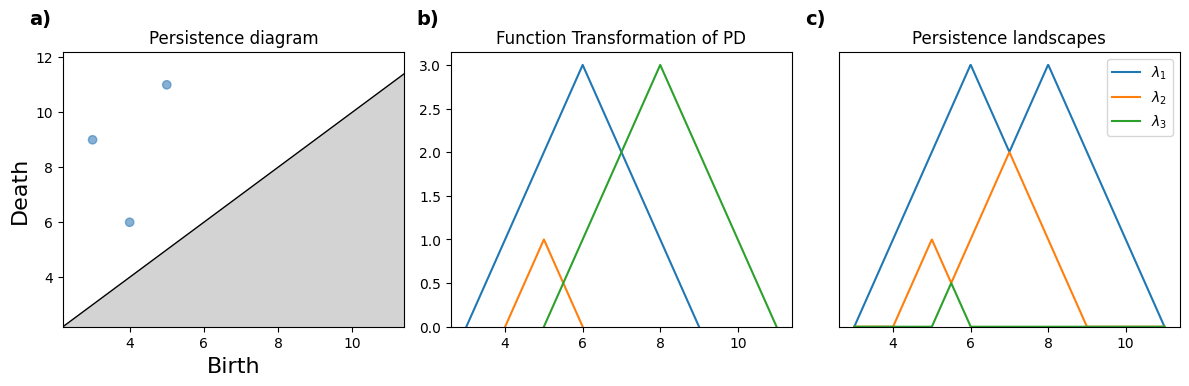

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

dgmX=[(1,(3,9)), # (dim, (birth,death)
     (1,(4,6)),
     (1,(5,11))]

gd.plot_persistence_diagram(dgmX,legend=False,axes=ax1) #legend false so that the dimension does not appear, they are all dim 0
ax1.set_title('Persistence diagram')
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')


#function transformation
intervals=np.array([[3,9],
           [4,6],
           [5,11]])

for i in intervals:
    f1=np.array([[i[0],0],[(i[0]+i[1])/2,(i[1]-i[0])/2],[i[1],0]])
    x_values = f1[:, 0]
    y_values = f1[:, 1]
    ax2.plot(x_values, y_values)
ax2.set_title("Function Transformation of PD")
ax2.text(-0.1, 1.1, 'b)', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2.set_ylim(0)

#persistence landscape
nL = intervals.shape[0]
resol=1000
LS = gd.representations.Landscape(num_landscapes=nL, resolution=resol,sample_range=[np.min(intervals),np.max(intervals)])
L = LS.fit_transform([intervals])
initial_point = np.min(intervals)
final_point = np.max(intervals)

# Generate 1000 equidistant points between start_point and end_point
points = np.linspace(initial_point, final_point, resol)
for i in range(nL):
    start=i*resol
    end=(i+1)*resol
    ax3.plot(points,L[0][start:end],label=f"$\lambda_{i+1}$")
ax3.set_title("Persistence landscapes")
ax3.text(-0.1, 1.1, 'c)', transform=ax3.transAxes, fontsize=14, fontweight='bold')
ax3.legend()
ax3.set_yticks([])
ax3.set_ylim(0)


plt.savefig('images/persistenceLandscapeExample.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Landscape dimension 0 and dimension 1: similar we will have robots, we can see how for dimension 0 it does not make much sense and cannot be calculated correctly.

Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value


/mnt/c/Users/cimagroup/Documents/Repositorios/NavgroundPypi/entorno/lib/python3.10/site-packages/gudhi/representations/vector_methods.py:208: RuntimeWarning: invalid value encountered in subtract
  tent_functions = np.maximum(heights[None, :] - np.abs(x_values[:, None] - midpoints[None, :]), 0)


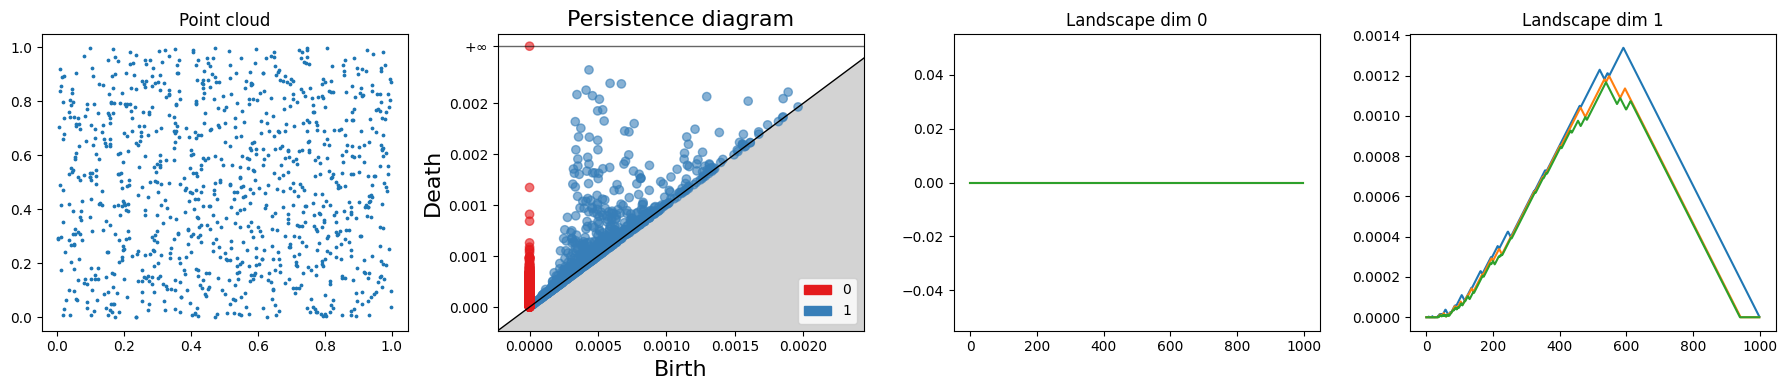

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))

num_pts = 1000
r       = 3.5

X = np.empty([num_pts,2])
x, y = np.random.uniform(), np.random.uniform()
for i in range(num_pts):
    X[i,:] = [x, y]
    x = (X[i,0] + r * X[i,1] * (1-X[i,1])) % 1.
    y = (X[i,1] + r * x * (1-x)) % 1.

ax1.scatter(X[:,0], X[:,1], s=3)
ax1.set_title("Point cloud")

acX = gd.AlphaComplex(points=X).create_simplex_tree()
dgmX = acX.persistence()

gd.plot_persistence_diagram(dgmX,axes=ax2,legend=True)

LS = gd.representations.Landscape(resolution=1000)
L = LS.fit_transform([acX.persistence_intervals_in_dimension(0)])

ax3.plot(L[0][:1000])
ax3.plot(L[0][1000:2000])
ax3.plot(L[0][2000:3000])
ax3.set_title("Landscape dim 0")

LS = gd.representations.Landscape(resolution=1000)
L = LS.fit_transform([acX.persistence_intervals_in_dimension(1)])

ax4.plot(L[0][:1000])
ax4.plot(L[0][1000:2000])
ax4.plot(L[0][2000:3000])
ax4.set_title("Landscape dim 1")

plt.tight_layout()
plt.savefig('images/persistenceLandscape0dimVS1dim.png', dpi=300, bbox_inches='tight')
plt.show()


## Persistence image

gd.representations.PersistenceImage? for understand the use of this function and how create persistence images.

Also, in a similar way from persistence landscapes, persistence images doesn't have sense to calculate for dimension 0.(Yes for dim 1)

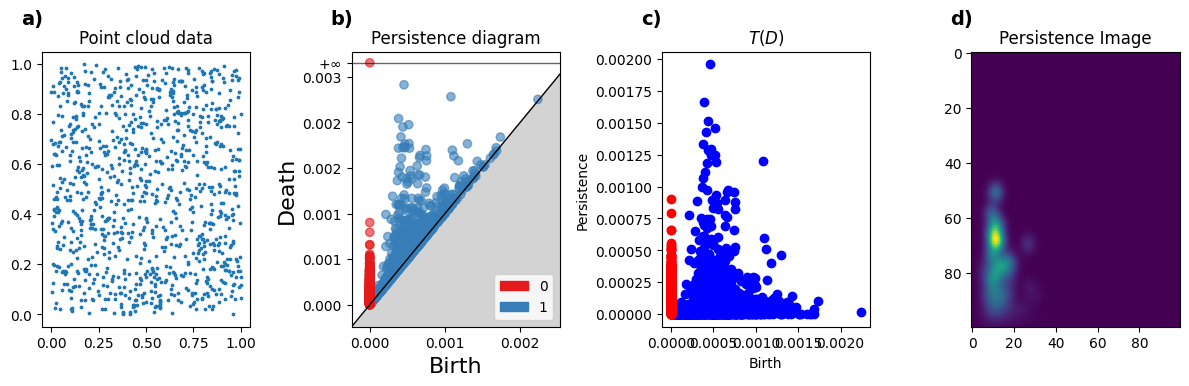

In [35]:
#data

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))

num_pts = 1000
r       = 3.5

X = np.empty([num_pts,2])
x, y = np.random.uniform(), np.random.uniform()
for i in range(num_pts):
    X[i,:] = [x, y]
    x = (X[i,0] + r * X[i,1] * (1-X[i,1])) % 1.
    y = (X[i,1] + r * x * (1-x)) % 1.

ax1.scatter(X[:,0], X[:,1], s=3)
ax1.set_title('Point cloud data')
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')
ax1.set_aspect('auto')

# diagram

acX = gd.AlphaComplex(points=X).create_simplex_tree()
dgmX = acX.persistence()

gd.plot_persistence_diagram(dgmX,legend=True,axes=ax2) 
ax2.set_title('Persistence diagram')
ax2.text(-0.1, 1.1, 'b)', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2.set_aspect('auto')

#function transformation
for i in dgmX:
    if i[0] == 0:
        ax3.scatter(i[1][0],i[1][1]-i[1][0],c="red",label="0")
    else:
        ax3.scatter(i[1][0],i[1][1]-i[1][0],c="blue",label="1")
ax3.set_title('$T(D)$')
ax3.text(-0.1, 1.1, 'c)', transform=ax3.transAxes, fontsize=14, fontweight='bold')
ax3.set_xlabel("Birth")
ax3.set_ylabel("Persistence")
ax3.set_aspect('auto')

#persistence landscape
PI = gd.representations.PersistenceImage(bandwidth=1e-4, weight=lambda x: x[1]**2, \
                                         im_range=[0,.004,0,.004], resolution=[100,100])
pi = PI.fit_transform([acX.persistence_intervals_in_dimension(1)])

ax4.imshow(np.flip(np.reshape(pi[0], [100,100]), 0))
ax4.set_title("Persistence Image")
ax4.text(-0.1, 1.1, 'd)', transform=ax4.transAxes, fontsize=14, fontweight='bold')
ax4.set_aspect('auto')

plt.tight_layout()
plt.savefig('images/persistenceImageExample.png', dpi=300, bbox_inches='tight')
plt.show()
